# Abalone dataset

To play with the code, first install `Anaconda` distribution of the Python.  
Go here: https://www.anaconda.com/download/ and download and install `Anaconda Python 3.* version` (3.6 at the moment in September 2017).

After install check what it works, running this in the command line:  
```
conda list
```
it will display the installed modules.

To start a notebook session, run in the command line:  
```
cd <the_dir_with_your_ *.ipynb files>
jupyter notebook
```

Please see also simple Neural Network tutorial as another example:  
https://dzubo.github.io/keras/2017/04/21/tutorial-on-using-keras-for-digits-recognition.html

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
# file_path = 'data/abalone.data'
names_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names'

## Data Exploration

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
df = pd.read_csv(file_path, header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df.shape

(4177, 9)

In [8]:
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole", "Shucked", "Viscera", "Shell", "Rings"]

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df.max()

Sex              M
Length       0.815
Diameter      0.65
Height        1.13
Whole       2.8255
Shucked      1.488
Viscera       0.76
Shell        1.005
Rings           29
dtype: object

In [11]:
df.min()

Sex              F
Length       0.075
Diameter     0.055
Height           0
Whole        0.002
Shucked      0.001
Viscera     0.0005
Shell       0.0015
Rings            1
dtype: object

In [12]:
sns.set(style="darkgrid")

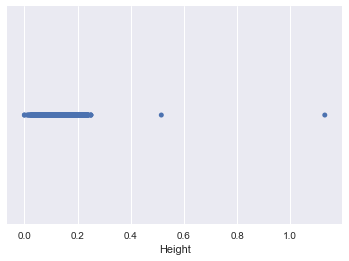

In [13]:
sns.stripplot(df.Height)

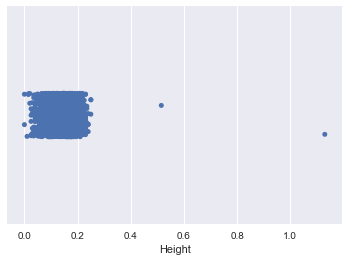

In [14]:
sns.stripplot(df.Height, jitter=True)

In [15]:
df = df[df.Height < 0.4]

In [16]:
df.shape

(4175, 9)

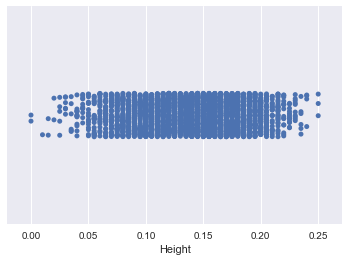

In [17]:
sns.stripplot(df.Height, jitter=True)

In [18]:
df.Height.min()

0.0

In [19]:
df = df[df.Height > 0]

In [20]:
df.shape

(4173, 9)

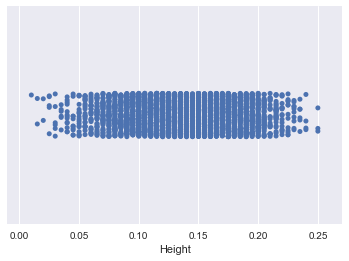

In [21]:
sns.stripplot(df.Height, jitter=True)

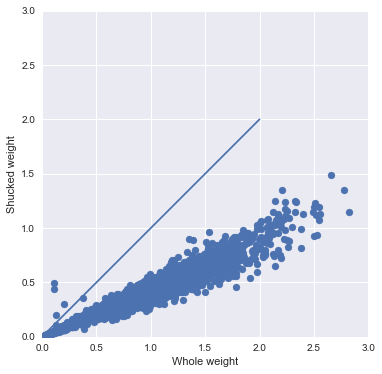

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(df.Whole, df.Shucked)
plt.xlabel('Whole weight')
plt.ylabel('Shucked weight')
plt.plot([0, 2], [0, 2])
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.gca().set_aspect('equal', adjustable='box')

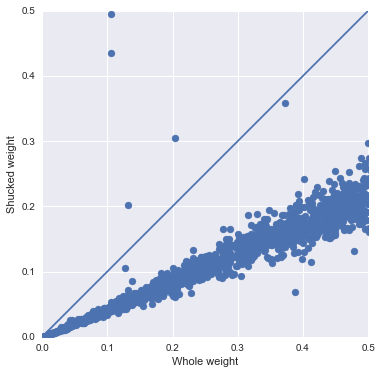

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df.Whole, df.Shucked)
plt.xlabel('Whole weight')
plt.ylabel('Shucked weight')
plt.plot([0, 1.4], [0, 1.4])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.gca().set_aspect('equal', adjustable='box')

In [24]:
df = df[df.Whole > df.Shucked]

In [25]:
df.shape

(4169, 9)

In [26]:
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
df['M'] = 0
df['F'] = 0
df['I'] = 0

In [28]:
df.loc[df.Sex == 'M','M'] = 1
df.loc[df.Sex == 'F','F'] = 1
df.loc[df.Sex == 'I','I'] = 1

In [29]:
# The same result

# for sex in 'MFI':
#     df.loc[df.Sex == sex, sex] = 1

In [30]:
df = df.drop(['Sex'], axis=1)

In [31]:
df.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1


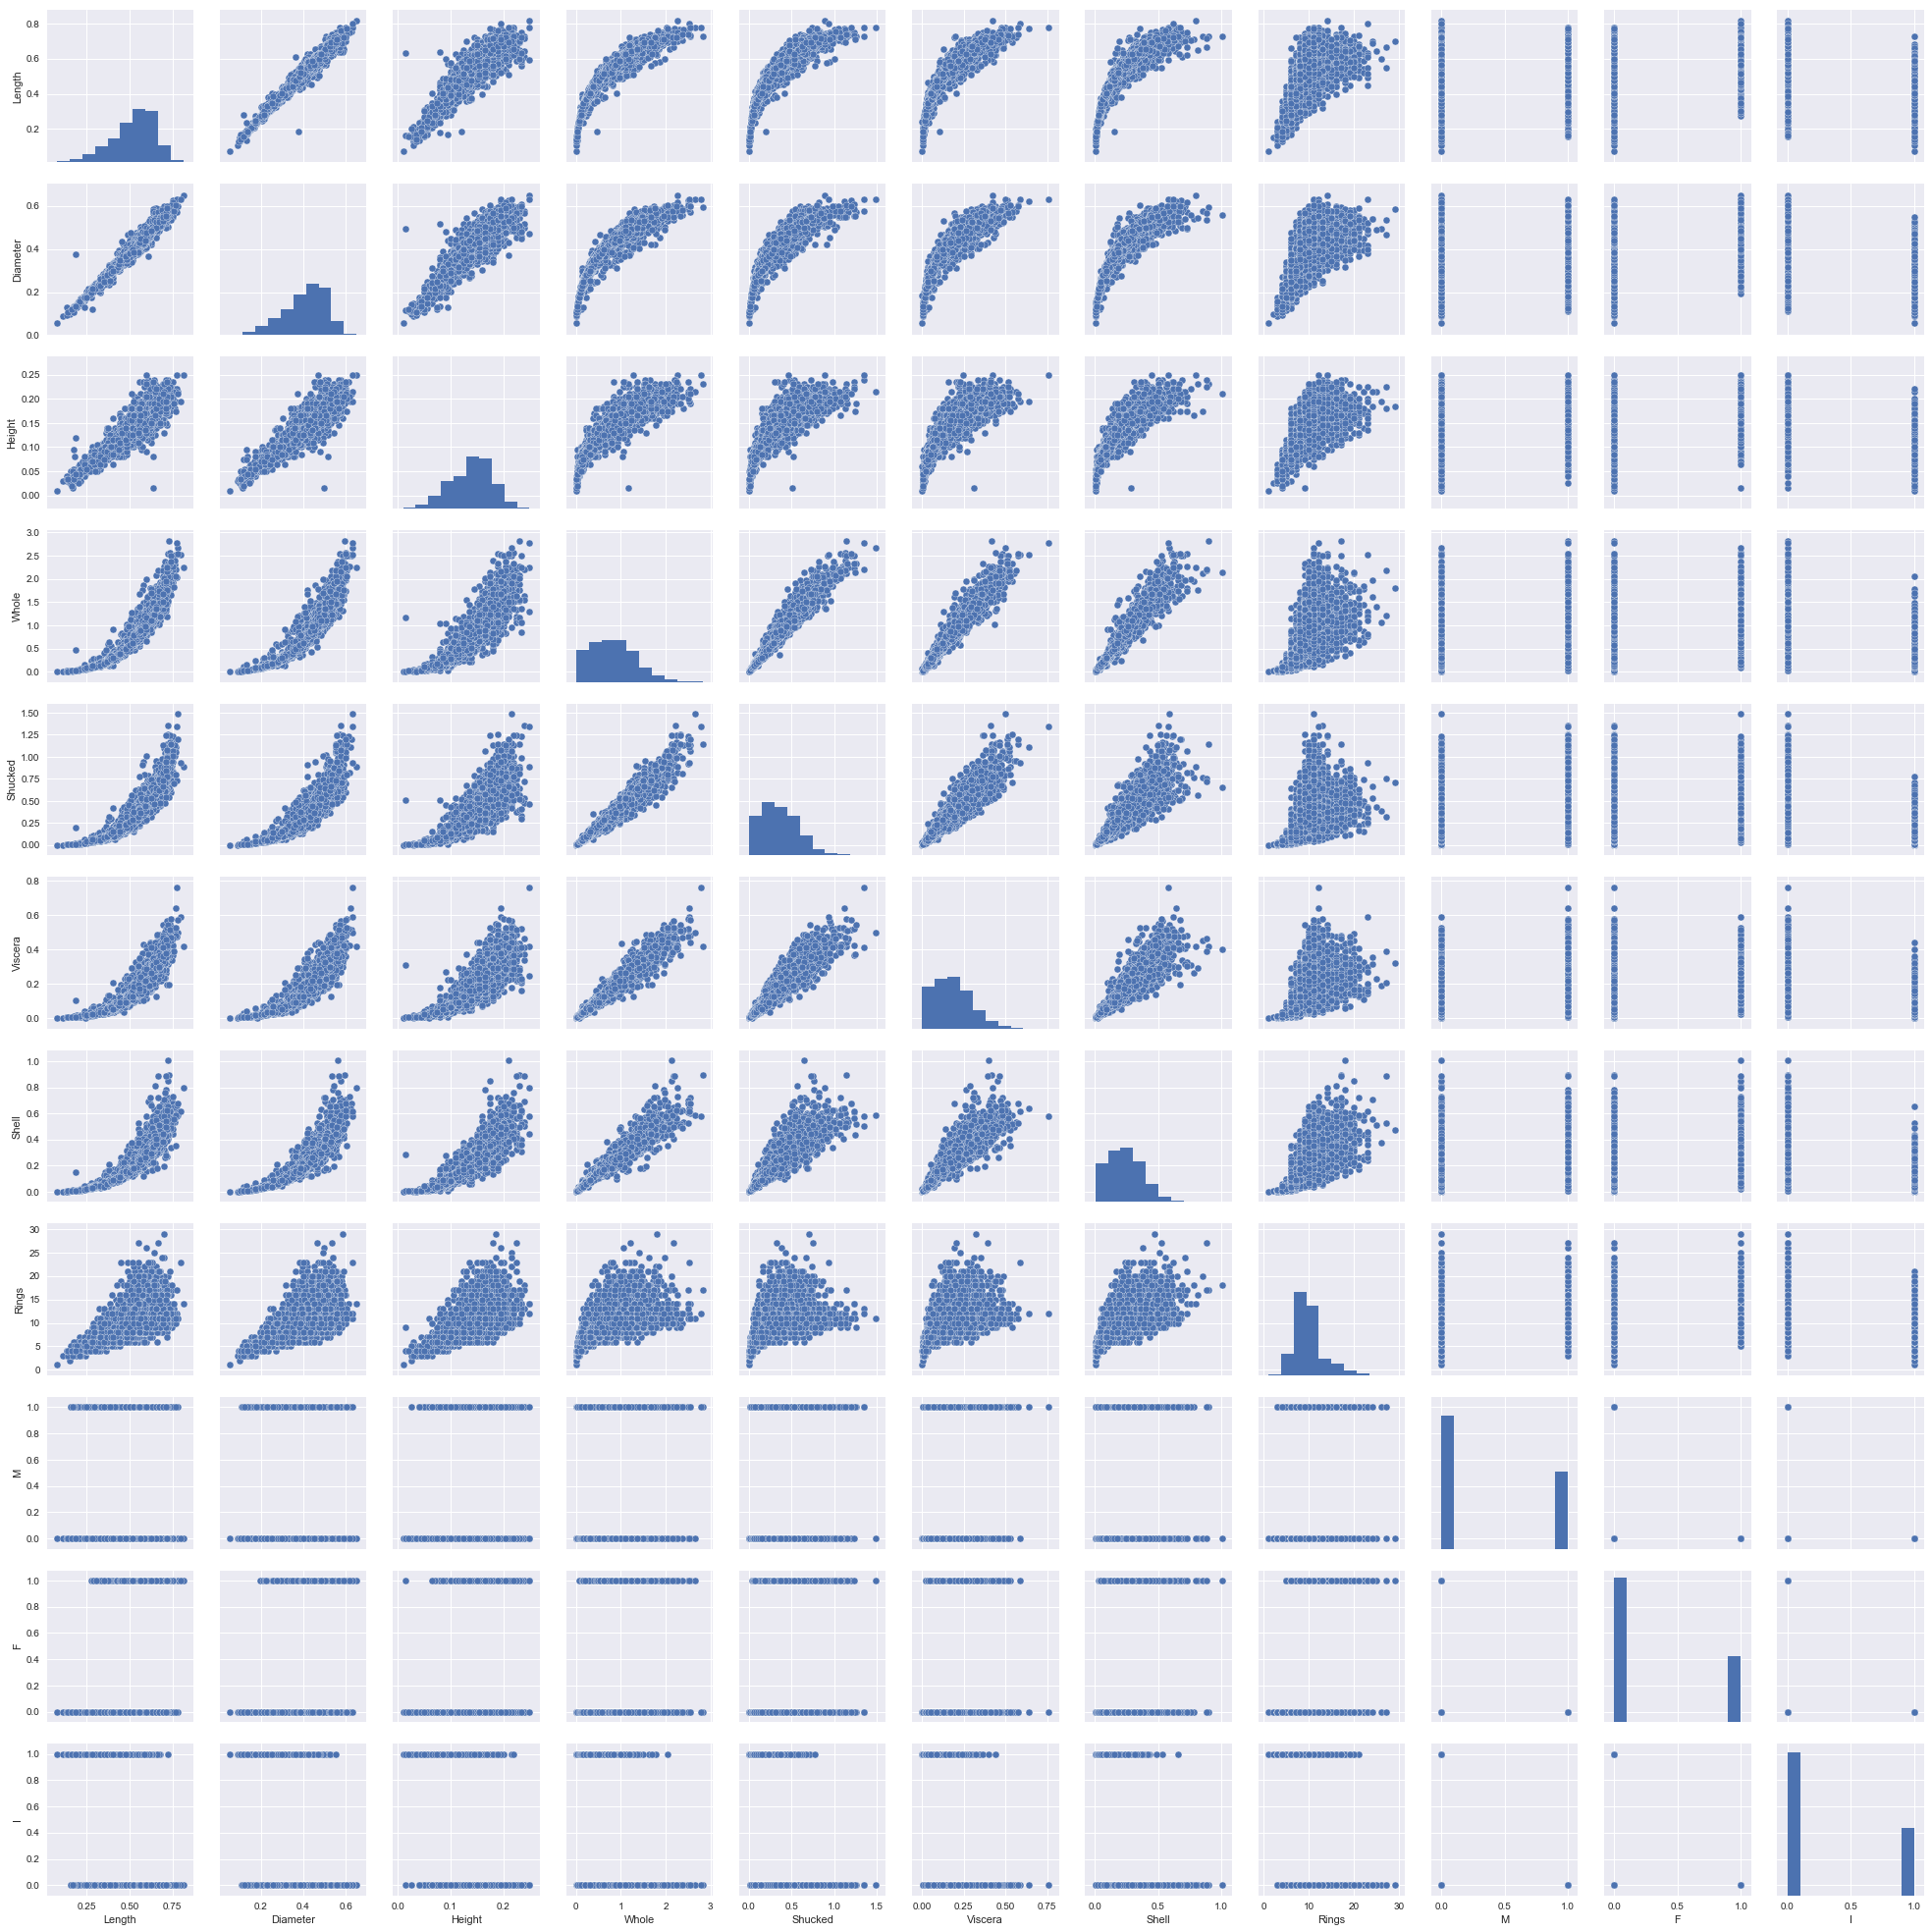

In [32]:
sns.pairplot(df)

## Training and testing splits

In [59]:
import random
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [60]:
np.random.seed(0)
X = np.linspace(0, 10, 10) + np.random.random(10)  - 0.5

In [61]:
# True model parameters
a = 0.5
b = 3

In [62]:
Y = a*X + b + 1.5*(np.random.random(10) - 0.5)

In [82]:
def plot_fix(x, y, color='b'):
    plt.figure(figsize=(7,7))
    plt.scatter(x, y, c=color, s=200, label='Train data')
    plt.legend(['Train data'], fontsize='xx-large', frameon=True, loc='lower right')
    plt.xlim(-2, 12)
    plt.ylim(0, 10)
    plt.gca().set_aspect('equal', adjustable='box')

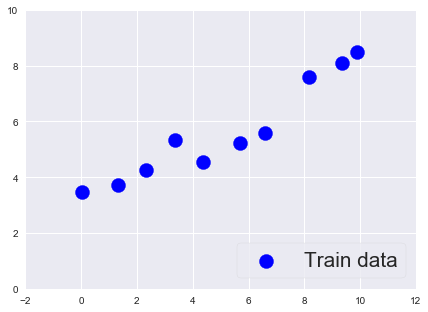

In [83]:
plot_fix(X, Y)

In [91]:
def plot_fit(X, Y, degree, color='b'):
    # Fit polynomial with degree=degree
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X, Y)

    # plot fitted polynomial
    xmin = min(X) - 0.1*(max(X) - min(X))
    xmax = max(X) + 0.1*(max(X) - min(X))
    x_plot = np.linspace(xmin, xmax, 100).reshape(-1, 1)
    y_plot = model.predict(x_plot).reshape(-1, 1)
    ax = plt.plot(x_plot, y_plot, str(color) + '-', linewidth=4)

    return(model, ax)

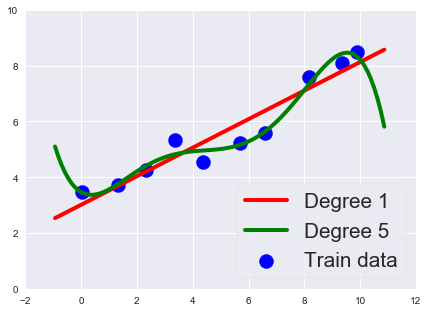

In [92]:
plt.figure(figsize=(7, 7))
plt.xlim(-2, 12)
plt.ylim(0, 10)

plt.scatter(X, Y, s=200, c='b')

X = X.reshape(-1, 1)
model_1, ax1 = plot_fit(X, Y, 1, 'r')
model_5, ax3 = plot_fit(X, Y, 5, 'g')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['Degree 1', 'Degree 5', 'Train data'], fontsize='xx-large', frameon=True, loc='lower right')

In [75]:
x_test = np.linspace(0, 10, 10) + np.random.random(10)  - 0.5

In [76]:
y_test = a*x_test + b + 1.5*(np.random.random(10) - 0.5)

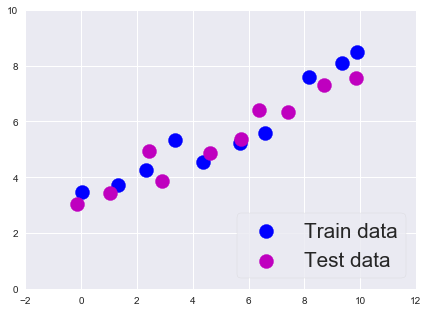

In [85]:
plt.figure(figsize=(7, 7))
plt.xlim(-2, 12)
plt.ylim(0, 10)
plt.scatter(X, Y, c='b', s=200)
plt.scatter(x_test, y_test, c='m', s=200)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['Train data', 'Test data'], fontsize='xx-large', frameon=True, loc='lower right')

In [86]:
# plt.figure(figsize=(7, 7))
# plt.xlim(-2, 12)
# plt.ylim(0, 10)
# plt.scatter(x_test, y_test, s=200, c='m')
# plt.gca().set_aspect('equal', adjustable='box')

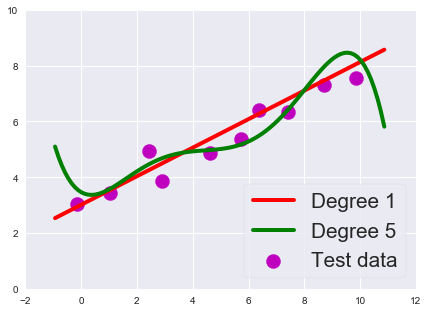

In [87]:
plt.figure(figsize=(7, 7))
plt.xlim(-2, 12)
plt.ylim(0, 10)
# plt.scatter(X, Y, s=200)
plt.scatter(x_test, y_test, s=200, c='m')

plot_fit(X, Y, 1, 'r')
plot_fit(X, Y, 5, 'g')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['Degree 1', 'Degree 5', 'Test data'], fontsize='xx-large', frameon=True, loc='lower right')

In [88]:
import math
x_test = x_test.reshape(-1, 1)

def rmse(y, y_hat):
    return math.sqrt(sum((y - y_hat)**2)/y.shape[0])
    
RMSE_1_train = rmse(Y, model_1.predict(X))
RMSE_1_test = rmse(y_test, model_1.predict(x_test))

RMSE_5_train = rmse(Y, model_5.predict(X))
RMSE_5_test = rmse(y_test, model_5.predict(x_test))

errors = pd.DataFrame({'RMSE linear model': [RMSE_1_train, RMSE_1_test],
                       'RMSE 5 degree polynomial': [RMSE_5_train, RMSE_5_test]},
                       index=['train', 'test'])

In [89]:
pd.options.display.float_format = '{:,.2f}'.format

In [90]:
errors

,RMSE 5 degree polynomial,RMSE linear model
train,0.26,0.51
test,0.57,0.45


### It is very important to have test dataset that was not involved in the process of fitting the model.

## Comparing models

In [93]:
df.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,M,F,I
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15,1,0,0
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7,1,0,0
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9,0,1,0
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10,1,0,0
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7,0,0,1


In [95]:
Y = df.Rings
X_length = df.Length
X_all = df[['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'M', 'F', 'I']]

In [99]:
X_all.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,M,F,I
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,1,0,0
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,1,0,0
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,0,1,0
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,1,0,0
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,0,0,1


In [ ]:
lm_1_1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())